The code in this file corresponds to the implementation of Fig. 5 in the paper.

This script requires the following Python dependencies:
- numpy
- matplotlib

1. Position miscorrection probability

/var/folders/3y/26j8vqwd3qj79fyhc5f3n9ww0000gn/T/ipykernel_46514/2952921390.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Delta2 = float(diff.T @ Sigma_core_inv @ diff)


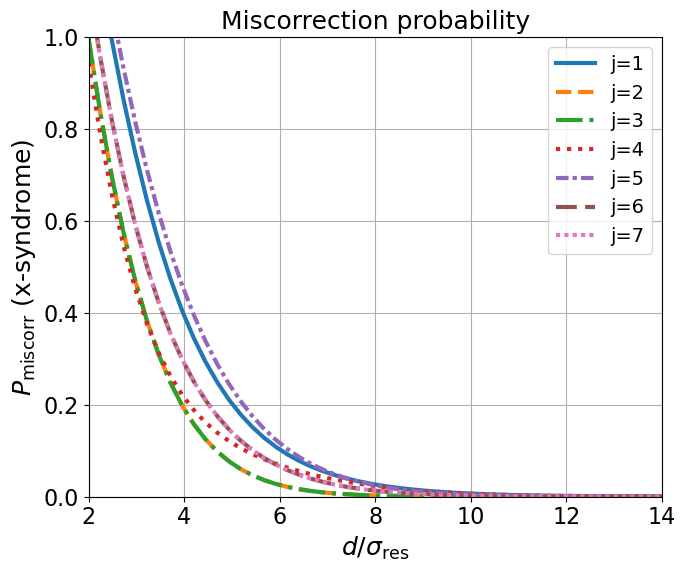

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Q-function: tail probability of standard Gaussian
def Q(x):
    from math import erfc
    return 0.5 * erfc(x / np.sqrt(2))

# x-syndrome matrix
Mx = np.array([
    [-1,  1, 0, 0, -1, -1, -2],
    [-1,  0, 1, 0, -1, -2, -1],
    [ 0,  0, 0, 1, -1, -1, -1]
], dtype=float)

# Inverse of Mx Mx^T (scale-independent)
Sigma_core_inv = np.linalg.inv(Mx @ Mx.T)

# Template columns m_j
mcols = [Mx[:, j].reshape(-1, 1) for j in range(Mx.shape[1])]

# Union bound for x-syndrome miscorrection
def union_bound_x(rho):
    J = len(mcols)
    P = np.zeros(J)
    for j in range(J):
        s = 0.0
        for k in range(J):
            if k == j:
                continue
            diff = mcols[j] - mcols[k]
            Delta2 = float(diff.T @ Sigma_core_inv @ diff)
            s += Q(0.5 * rho * np.sqrt(Delta2))
        P[j] = s
    return P

# Sweep rho values
rhos = np.linspace(2, 14, 50)
P_all = np.array([union_bound_x(rho) for rho in rhos])

# Plot
plt.figure(figsize=(7, 6))
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 2)), (0, (1, 1))]

for j in range(7):
    plt.plot(rhos, P_all[:, j], label=f"j={j+1}", linestyle=linestyles[j], linewidth=3)

plt.rcParams.update({
    "font.size": 16,
    "axes.labelsize": 18,
    "axes.titlesize": 18,
    "legend.fontsize": 14,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16
})

plt.xlabel(r"$ d / \sigma_{\mathrm{res}}$")
plt.ylabel("$P_{\mathrm{miscorr}}$ (x-syndrome)")
plt.title("Miscorrection probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 1)
plt.xlim(2, 14)
plt.show()


2. Momentum miscorrection probability

/var/folders/3y/26j8vqwd3qj79fyhc5f3n9ww0000gn/T/ipykernel_46514/347965712.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Delta2 = float(diff.T @ Sigma_core_inv @ diff)


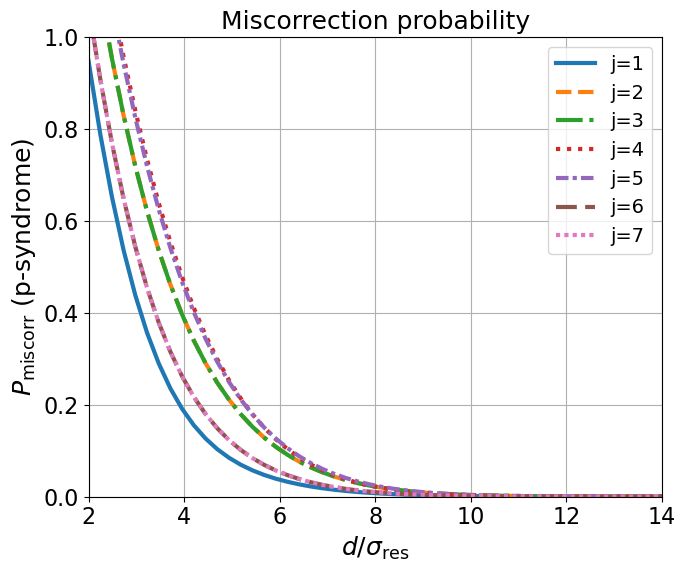

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Q-function: tail probability of standard Gaussian
def Q(x):
    from math import erfc
    return 0.5 * erfc(x / np.sqrt(2))

# p-syndrome matrix Mp
Mp = np.array([
    [ 0, -1, -1, -1, -1,  0,  0],
    [ 1,  0, -1, -1,  0, -1,  0],
    [ 1, -1,  0, -1,  0,  0, -1]
], dtype=float)

# Inverse of Mp Mp^T
Sigma_core_inv = np.linalg.inv(Mp @ Mp.T)

# Column vectors m_j
mcols = [Mp[:, j].reshape(-1, 1) for j in range(Mp.shape[1])]

# Union bound for p-syndrome miscorrection
def union_bound_p(rho):
    J = len(mcols)
    P = np.zeros(J)
    for j in range(J):
        s = 0.0
        for k in range(J):
            if k == j:
                continue
            diff = mcols[j] - mcols[k]
            Delta2 = float(diff.T @ Sigma_core_inv @ diff)
            s += Q(0.5 * rho * np.sqrt(Delta2))
        P[j] = s
    return P

# Sweep rho
rhos = np.linspace(2, 14, 50)
P_all = np.array([union_bound_p(rho) for rho in rhos])

# Plot
plt.figure(figsize=(7, 6))
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 2)), (0, (1, 1))]
for j in range(7):
    plt.plot(rhos, P_all[:, j], label=f"j={j+1}", linestyle=linestyles[j], linewidth=3)

plt.rcParams.update({
    "font.size": 16,
    "axes.labelsize": 18,
    "axes.titlesize": 18,
    "legend.fontsize": 14,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16
})

plt.xlabel(r"$ d / \sigma_{\mathrm{res}}$")
plt.ylabel("$P_{\mathrm{miscorr}}$ (p-syndrome)")
plt.title("Miscorrection probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 1)
plt.xlim(2, 14)
plt.show()